In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sys
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
from math import sqrt
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

warnings.filterwarnings('ignore')

#для работоспособности модуля верхнего уровня
sys.path.append("..")

from models.Metrics import mean_abs_err, mean_squared_err, root_mse, mean_abs_perc_err, r_squared
from models.Regression import MyLinearRegression

# Создание единого датасета

In [3]:
data_red = pd.read_csv('../data/winequality-red.csv', sep = ';')
data_white = pd.read_csv('../data/winequality-white.csv', sep = ';')
pd.set_option('display.max_columns', 30)

In [4]:
data_red

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [5]:
data_white

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


Объединим два датасета с красным и белым винами в единый (с учетом одинаковой структуры) для удобства дальнейшей работы

In [6]:
data = pd.concat([data_red, data_white])
data.reset_index(inplace = True)
data.drop(['index'], axis = 1, inplace = True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 609.2 KB


# Подготовка данных

## Пропущенные значения

Проверим датасет на пропуски и явные дубликаты

In [8]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [9]:
data.duplicated().sum()

1179

Обработка не требуется

## EDA

Изучим датасет на наличие выбросов

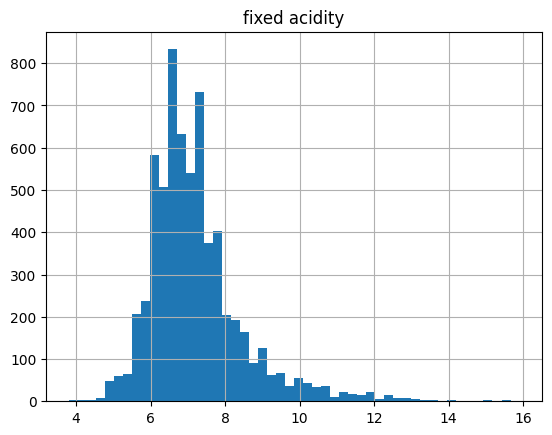

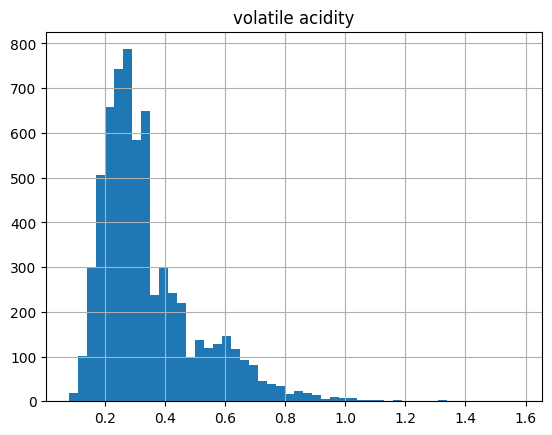

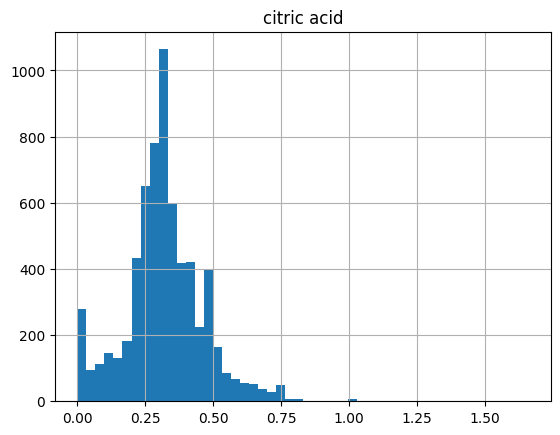

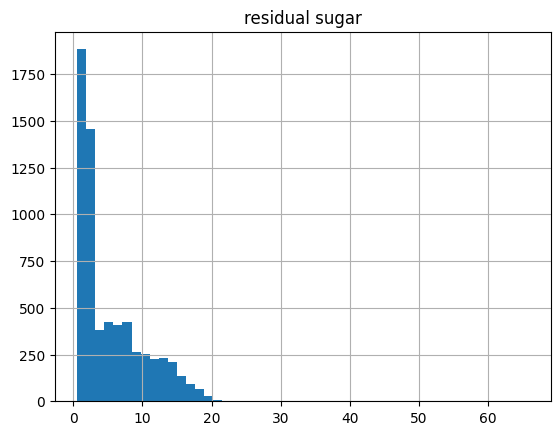

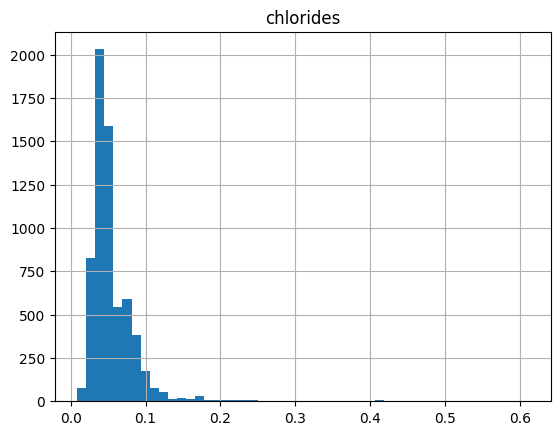

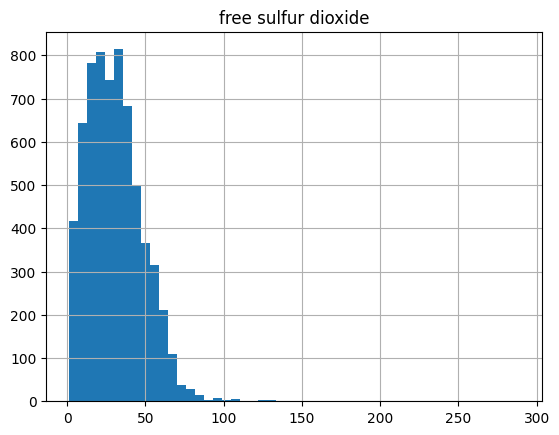

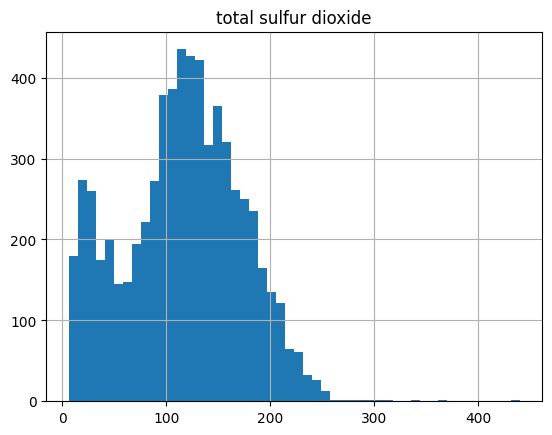

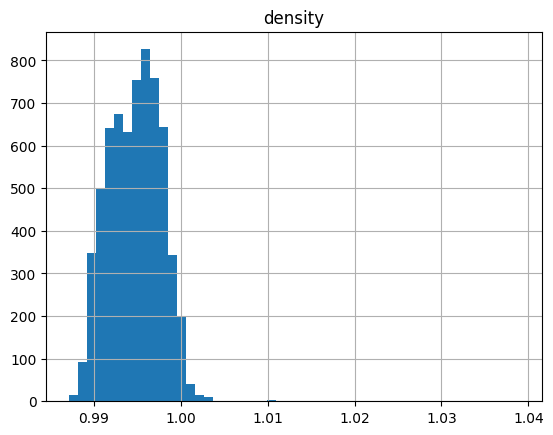

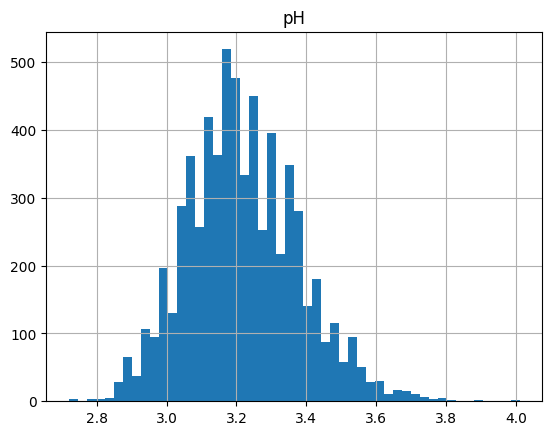

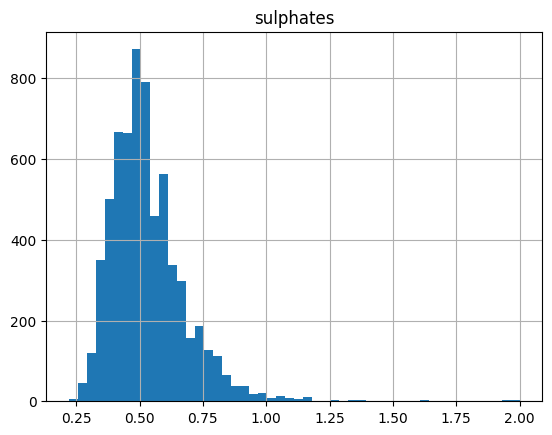

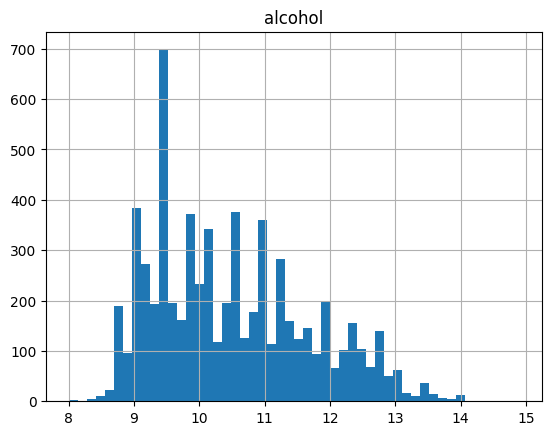

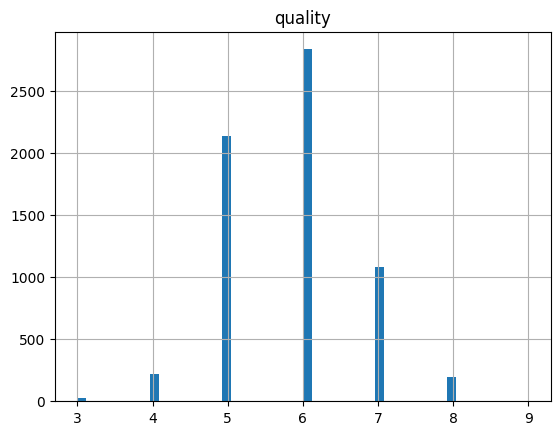

In [10]:
columns = data.columns.to_list()

for column in columns:
    data.hist(column, bins = 50)

Судя по гистограммам, распределение данных выглядит вполне естественно. Обработка выбросов не требуется.

In [11]:
data = pd.read_csv('../data/winequality.csv')

# Разделение выборок

Отделим целевой признак **quality** от данных, разделим полученные датасеты на **тренировочную** и **тестовую** выборки

In [12]:
y = data['quality']
X = data.drop(['quality'], axis=1)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y)

Выведем размеры выборок

In [14]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((5197, 12), (5197,), (1300, 12), (1300,))

# Регрессии

## Простая линейная регрессия

Определим функции для расчета **метрик качества модели**, основанные на методах sklearn и ручной реализации **(../models/Metrics.py)**, а также функцию вывода **сравнения плотностей распределения** тестовых данных и предсказанных моделью

In [15]:
def show_errors(y_test, y_pred):
    MAE = mean_absolute_error(y_test, y_pred)
    MSE = mean_squared_error(y_test, y_pred)
    RMSE = sqrt(mean_squared_error(y_test, y_pred))
    MAPE = mean_absolute_percentage_error(y_test, y_pred)
    R2 = r2_score(y_test, y_pred)
    
    return {'MAE' : MAE, 'MSE' : MSE, 'RMSE' : RMSE, 'MAPE': MAPE, 'R2' : R2}

def show_my_errors(y_test, y_pred):
    MAE = mean_abs_err(y_test, y_pred)
    MSE = mean_squared_err(y_test, y_pred)
    RMSE = root_mse(y_test, y_pred)
    MAPE = mean_abs_perc_err(y_test, y_pred)
    R2 = r_squared(y_test, y_pred)

    return {'myMAE' : MAE, 'myMSE' : MSE, 'myRMSE' : RMSE, 'myMAPE': MAPE, 'myR2' : R2}

def show_displacing(y_test, y_pred):
    plt.figure(figsize=(12,10))
    ax2 = sns.distplot(y_test, hist=False, color='Red', label='Actual values')
    sns.distplot(y_pred, hist=False, color='Green', label='Predicted values')
    plt.show()

Построим тепловую карту для нахождения **наиболее коррелирующего** с предсказываемым признаком **предиктора**

<Axes: >

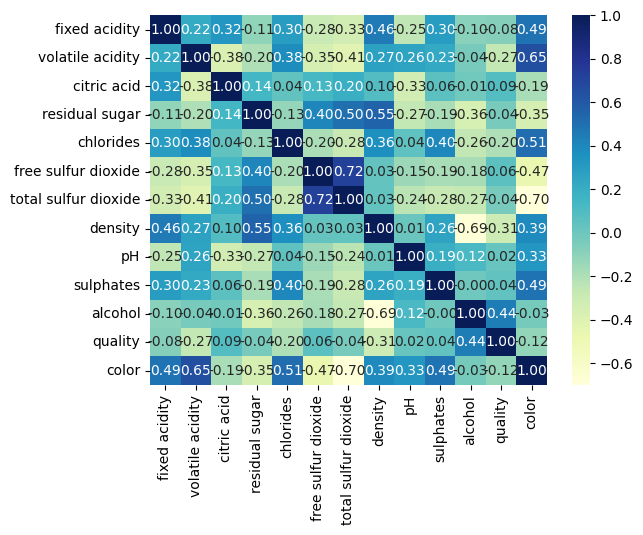

In [16]:
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu", fmt=".2f")

Отделим наиболее коррелирующий с предсказываемым признаком предиктор **alcohol** и построим модель **простой линейной регрессии**

In [17]:
X_train_slr = X_train['alcohol'].values.reshape(-1,1)
X_test_slr = X_test['alcohol'].values.reshape(-1,1)
slr = LinearRegression().fit(X_train_slr, y_train)
y_pred = slr.predict(X_test_slr)

Выведем единственный вес предиктора

In [18]:
slr.coef_

array([0.3254107])

Выведем метрики ошибок

In [19]:
slr_def = show_errors(y_test, y_pred)
print(slr_def)
print(show_my_errors(y_test.values, y_pred))

{'MAE': 0.6249272286929979, 'MSE': 0.613761307657726, 'RMSE': 0.7834291976035397, 'MAPE': 0.11192245594653899, 'R2': 0.19609648335311702}
{'myMAE': 0.6249272286929979, 'myMSE': 0.613761307657726, 'myRMSE': 0.7834291976035397, 'myMAPE': 0.11192245594653899, 'myR2': 0.19609648335311702}


Также выведем графики плотностей распределения реальных и предсказанных данных для визуальной оценки модели

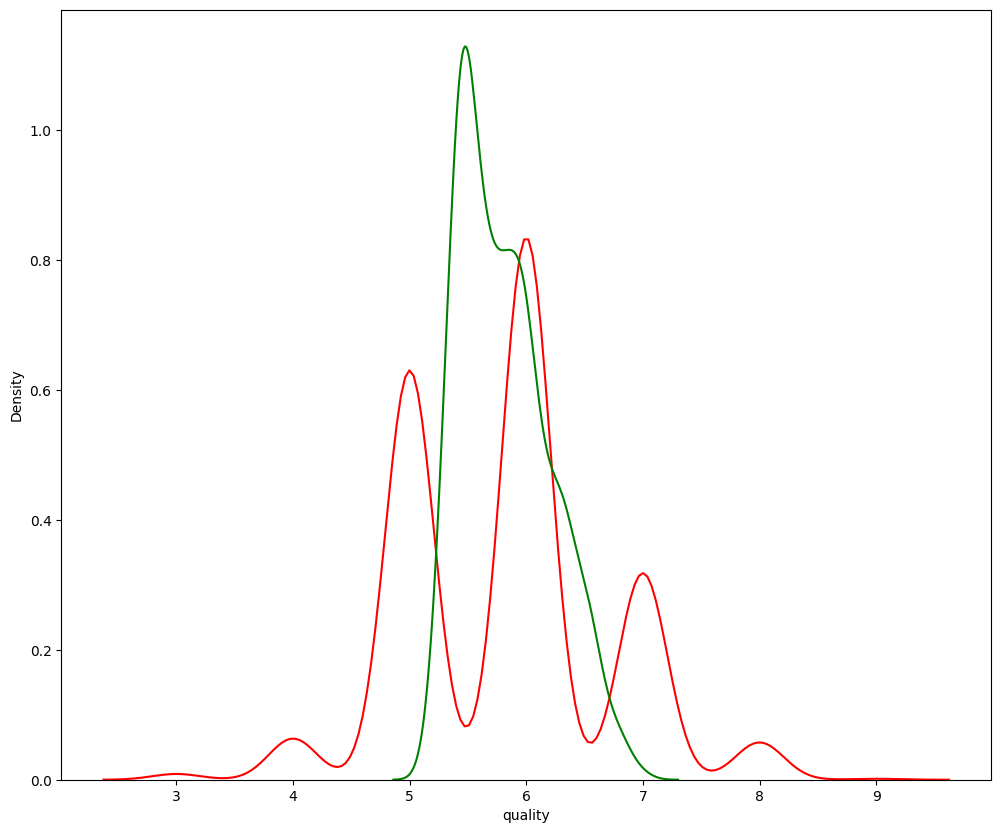

In [20]:
show_displacing(y_test, y_pred)

### Ridge

Найдем наилучший гиперпараметр для Ridge регуляризации с помощью **поиска по сетке**. Для этого сначала создадим **массив возможных параметров**

In [21]:
parameters_r = {'alpha': np.arange(0.01, 1, 0.1)}

Задаим поиск по сетке

In [22]:
ridge_optimal = GridSearchCV(Ridge(), parameters_r).fit(X_train_slr, y_train)
ridge_optimal.best_params_

{'alpha': 0.91}

Оптимальный параметр - 0.91

Обучим модель с учетом Ridge регуляризации

In [23]:
ridge_slr = Ridge(alpha=ridge_optimal.best_params_['alpha']).fit(X_train_slr, y_train)
y_pred = ridge_slr.predict(X_test_slr)

Выведем метрики ошибок

In [24]:
slr_ridge = show_errors(y_test, y_pred)
print(slr_ridge)
print(show_my_errors(y_test.values, y_pred))

{'MAE': 0.6249285407709999, 'MSE': 0.6137612537651546, 'RMSE': 0.7834291632082345, 'MAPE': 0.11192278470849118, 'R2': 0.19609655394151537}
{'myMAE': 0.6249285407709999, 'myMSE': 0.6137612537651546, 'myRMSE': 0.7834291632082345, 'myMAPE': 0.11192278470849118, 'myR2': 0.19609655394151537}


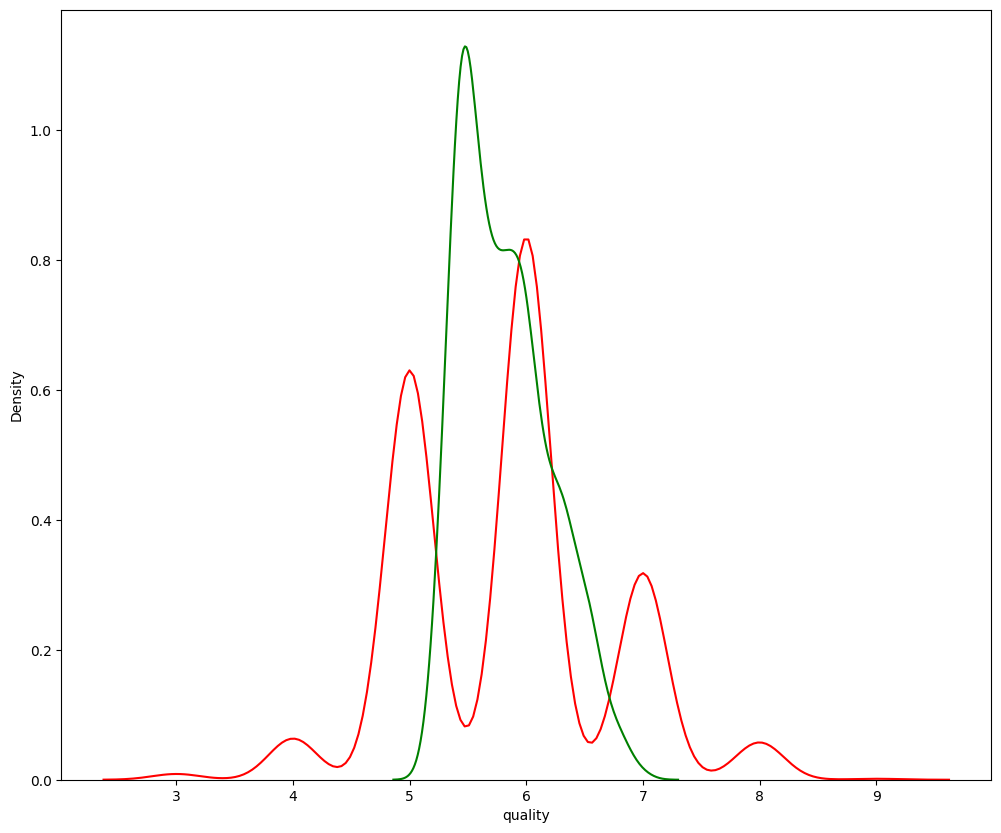

In [25]:
show_displacing(y_test, y_pred)

### Lasso

Аналогично зададим массив допустимых параметров и определим наиболее оптимальный

In [26]:
parameters_l = {'alpha': np.arange(0.01, 1, 0.1)}

Обучим модель с учетом Lasso регуляризации

In [27]:
lasso_optimal = GridSearchCV(Lasso(), parameters_l).fit(X_train_slr, y_train)
lasso_optimal.best_params_

{'alpha': 0.01}

In [28]:
lasso_slr = Lasso(alpha=lasso_optimal.best_params_['alpha']).fit(X_train_slr, y_train)
y_pred = lasso_slr.predict(X_test_slr)

In [29]:
slr_lasso = show_errors(y_test, y_pred)
print(slr_lasso)
print(show_my_errors(y_test.values, y_pred))

{'MAE': 0.62515946836966, 'MSE': 0.6138214468750242, 'RMSE': 0.7834675787006277, 'MAPE': 0.1119804382826025, 'R2': 0.19601771310860794}
{'myMAE': 0.62515946836966, 'myMSE': 0.6138214468750242, 'myRMSE': 0.7834675787006277, 'myMAPE': 0.1119804382826025, 'myR2': 0.19601771310860794}


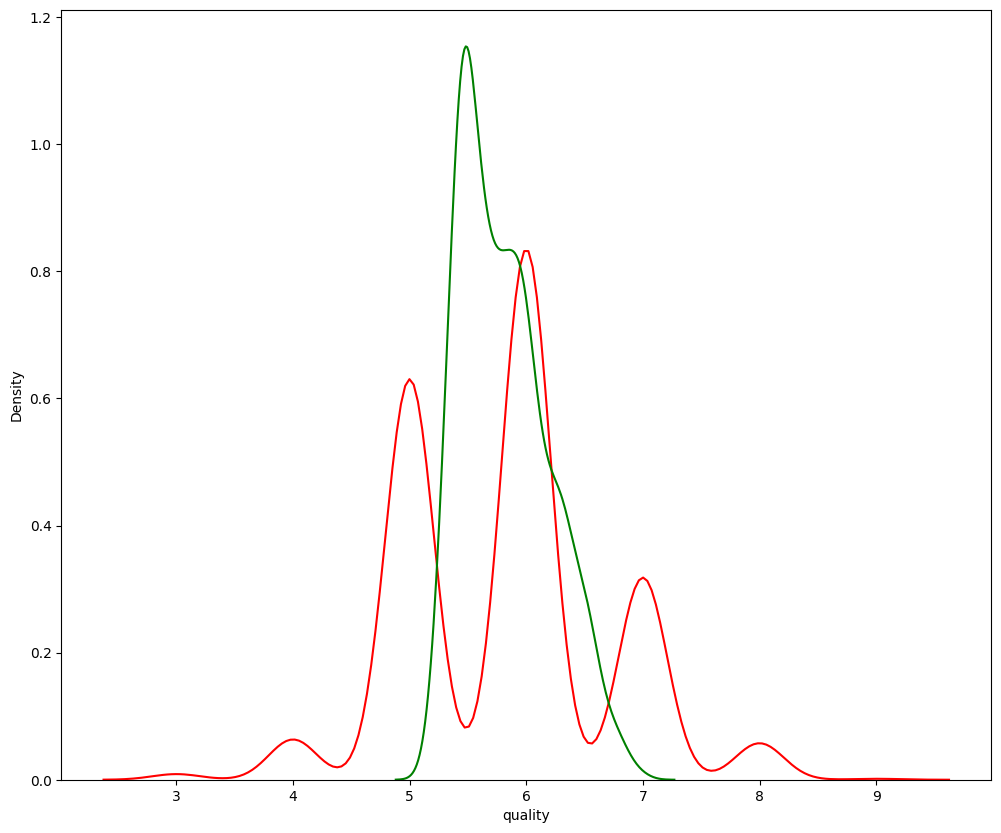

In [30]:
show_displacing(y_test, y_pred)

### Elastic Net

Аналогично **зададим словарь** с массивами допустимых параметров и определим наиболее оптимальные из них. Далее применим параметры при обучении с учетом регуляризации Elastic Net.

In [31]:
parameters_elnet = {'alpha':[0.01,1,10,100],'l1_ratio':[0.01,0.75,0.99,1]}
elnet_optimal = GridSearchCV(ElasticNet(max_iter=100000), parameters_elnet, scoring = 'neg_mean_squared_error').fit(X_train_slr, y_train)
alpha = elnet_optimal.best_params_['alpha']
l1_ratio = elnet_optimal.best_params_['l1_ratio']

In [32]:
elnet_slr = ElasticNet(alpha=alpha, l1_ratio=l1_ratio).fit(X_train_slr, y_train)
y_pred = elnet_slr.predict(X_test_slr)

Выведем ошибки

In [33]:
slr_elastic = show_errors(y_test, y_pred)
print(slr_elastic)
print(show_my_errors(y_test.values, y_pred))

{'MAE': 0.6250031957464832, 'MSE': 0.6137656721783074, 'RMSE': 0.7834319831218964, 'MAPE': 0.11194149069658327, 'R2': 0.1960907667114844}
{'myMAE': 0.6250031957464832, 'myMSE': 0.6137656721783074, 'myRMSE': 0.7834319831218964, 'myMAPE': 0.11194149069658327, 'myR2': 0.1960907667114844}


### Отбор наилучшей модели 

In [34]:
slr = [slr_def, slr_ridge, slr_lasso, slr_elastic]

Выберем наилучшую модель

In [35]:
for i in slr:
    print(i)

{'MAE': 0.6249272286929979, 'MSE': 0.613761307657726, 'RMSE': 0.7834291976035397, 'MAPE': 0.11192245594653899, 'R2': 0.19609648335311702}
{'MAE': 0.6249285407709999, 'MSE': 0.6137612537651546, 'RMSE': 0.7834291632082345, 'MAPE': 0.11192278470849118, 'R2': 0.19609655394151537}
{'MAE': 0.62515946836966, 'MSE': 0.6138214468750242, 'RMSE': 0.7834675787006277, 'MAPE': 0.1119804382826025, 'R2': 0.19601771310860794}
{'MAE': 0.6250031957464832, 'MSE': 0.6137656721783074, 'RMSE': 0.7834319831218964, 'MAPE': 0.11194149069658327, 'R2': 0.1960907667114844}


Видим, что параметры в третьей строке наилучший R2 (при остальных одинаковых), поэтому **наилучшая модель это Lasso**

In [36]:
print(slr[2])

{'MAE': 0.62515946836966, 'MSE': 0.6138214468750242, 'RMSE': 0.7834675787006277, 'MAPE': 0.1119804382826025, 'R2': 0.19601771310860794}


## Масштабирование

Масштабируем данные с помощью StandardScaler()

In [37]:
scaler = StandardScaler()

In [38]:
scaler.fit(X_train)

StandardScaler()

In [39]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Множественная линейная регрессия

Обучим модель **множественной линейной регрессии** для предсказания качества вина с помощью метода fit()

In [40]:
mlr = LinearRegression().fit(X_train, y_train)

Получим предсказания, просчитанные моделью на основе тестовой выборки

In [41]:
y_pred = mlr.predict(X_test)

Рассмотрим веса, присвоенные моделью признакам

In [42]:
mlr.coef_

array([ 0.1256251 , -0.26113278, -0.00255147,  0.33381119, -0.01373504,
        0.07897471, -0.07365775, -0.36969034,  0.07929471,  0.10906788,
        0.23861252,  0.19204656])

Заметим, что **часть признаков неинформативна** по причине близости абсолютного значения к нулю. 

Рассчитаем метрики качества для полученного предсказания 

In [43]:
mlr_def = show_errors(y_test, y_pred)
print(mlr_def)
print(show_my_errors(y_test.values, y_pred))

{'MAE': 0.5808537903440333, 'MSE': 0.5606230262516283, 'RMSE': 0.7487476385616373, 'MAPE': 0.10376120312608217, 'R2': 0.26569691394063133}
{'myMAE': 0.5808537903440333, 'myMSE': 0.5606230262516283, 'myRMSE': 0.7487476385616373, 'myMAPE': 0.10376120312608217, 'myR2': 0.26569691394063133}


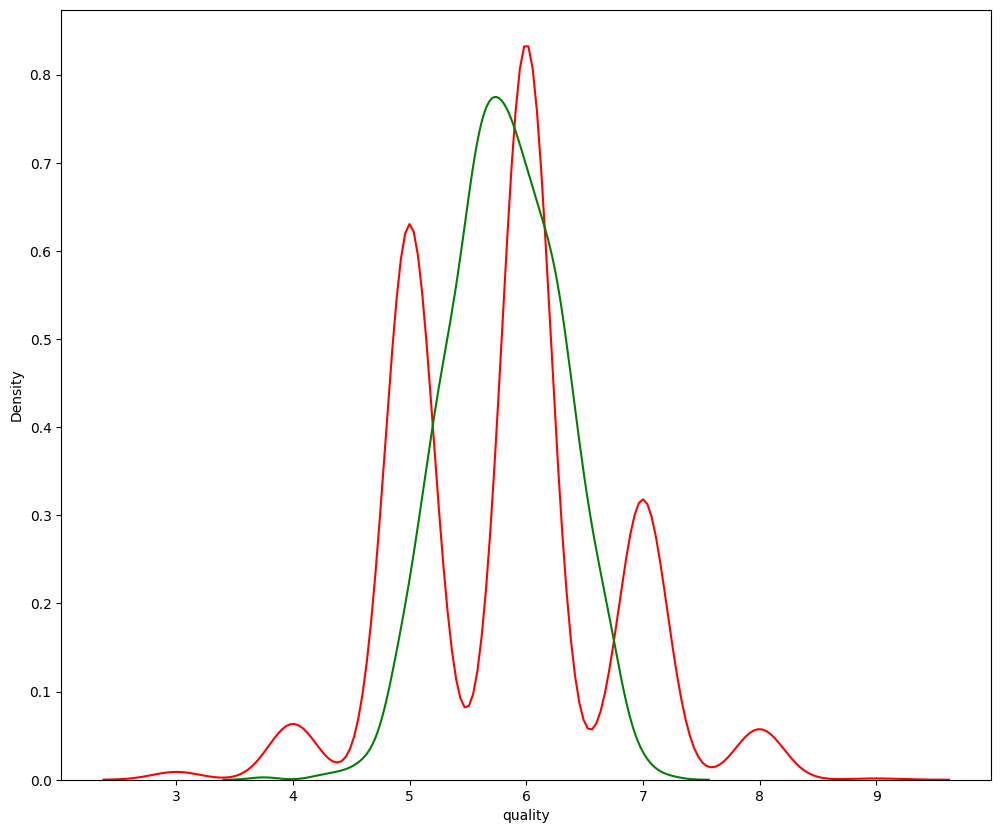

In [44]:
show_displacing(y_test, y_pred)

### Ridge регуляризация

In [45]:
parameters_r = {'alpha': np.arange(0, 1, 0.1)}

Далее зададим поиск по сетке, который выберет наиболее оптимальный гиперпараметр для штрафа

In [46]:
ridge_optimal = GridSearchCV(Ridge(), parameters_r).fit(X_train, y_train)
ridge_optimal.best_params_

{'alpha': 0.9}

Отсюда получаем, что **alpha = 0.9**

Теперь обучим модель, применяя Ridge регуляризацию с найденным параметром

In [47]:
ridge_mlr = Ridge(alpha=ridge_optimal.best_params_['alpha']).fit(X_train, y_train)
y_pred = ridge_mlr.predict(X_test)

Рассмотрим веса, присвоенные моделью признакам по итогам обучения

In [48]:
ridge_mlr.coef_

array([ 0.12466045, -0.26105858, -0.00254955,  0.33214142, -0.01382363,
        0.07906046, -0.07388063, -0.36705582,  0.078739  ,  0.10891808,
        0.23969342,  0.19103521])

В результате Ridge регуляризации часть предикторов оказалась незначимымой по причине сильной близкости к нулю. Рассмотрим метрики ошибок        

In [49]:
mlr_ridge = show_errors(y_test, y_pred)
print(mlr_ridge)
print(show_my_errors(y_test.values, y_pred))

{'MAE': 0.5808268344267731, 'MSE': 0.5605298838195587, 'RMSE': 0.748685437162737, 'MAPE': 0.10375572206135295, 'R2': 0.2658189117397033}
{'myMAE': 0.5808268344267731, 'myMSE': 0.5605298838195587, 'myRMSE': 0.748685437162737, 'myMAPE': 0.10375572206135295, 'myR2': 0.2658189117397034}


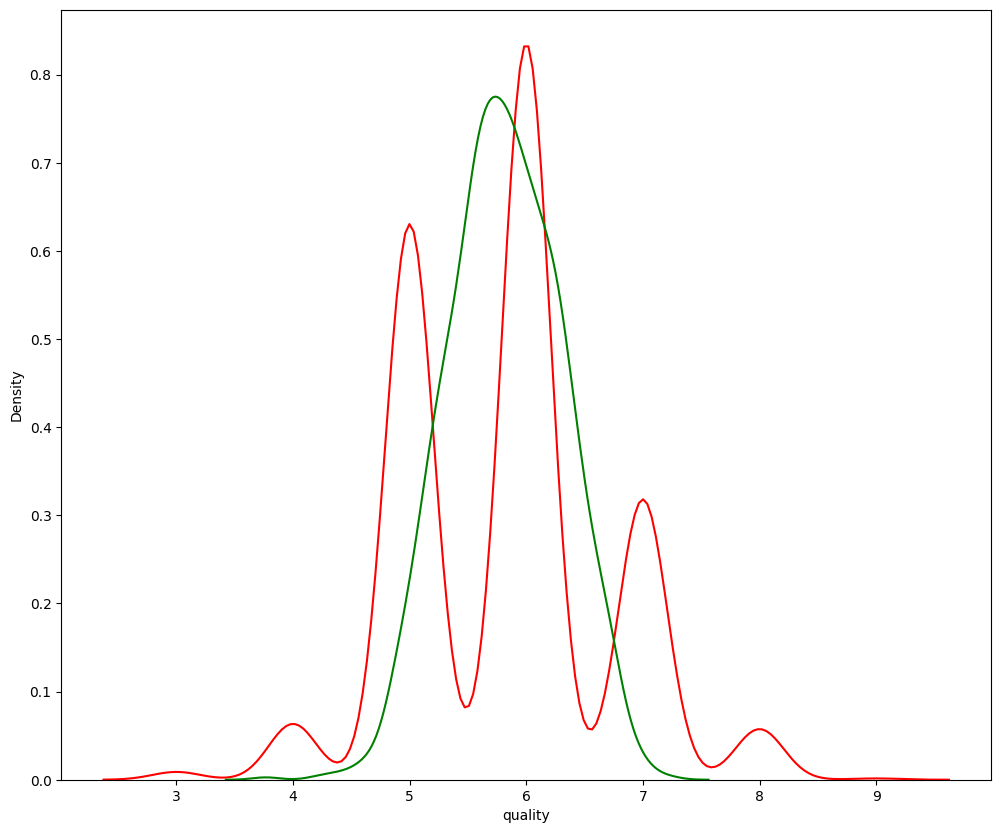

In [50]:
show_displacing(y_test, y_pred)

Отсюда видим, что с применением L1 результаты заметно не изменились. Перейдем к Lasso

### Lasso регуляризация

Проведем аналогичные операции

In [51]:
lasso_optimal = GridSearchCV(Lasso(), parameters_l).fit(X_train, y_train)
lasso_optimal.best_params_

{'alpha': 0.01}

Оптимальный коэффициент - **0.01** 

In [52]:
lasso_mlr = Lasso(alpha=lasso_optimal.best_params_['alpha']).fit(X_train, y_train)
y_pred = lasso_mlr.predict(X_test)

In [53]:
mlr_lasso = show_errors(y_test, y_pred)
print(mlr_lasso)
print(show_my_errors(y_test.values, y_pred))

{'MAE': 0.5833879565965466, 'MSE': 0.5613538409060811, 'RMSE': 0.7492355043016055, 'MAPE': 0.1041549093545809, 'R2': 0.26473969414948206}
{'myMAE': 0.5833879565965466, 'myMSE': 0.5613538409060811, 'myRMSE': 0.7492355043016055, 'myMAPE': 0.1041549093545809, 'myR2': 0.26473969414948206}


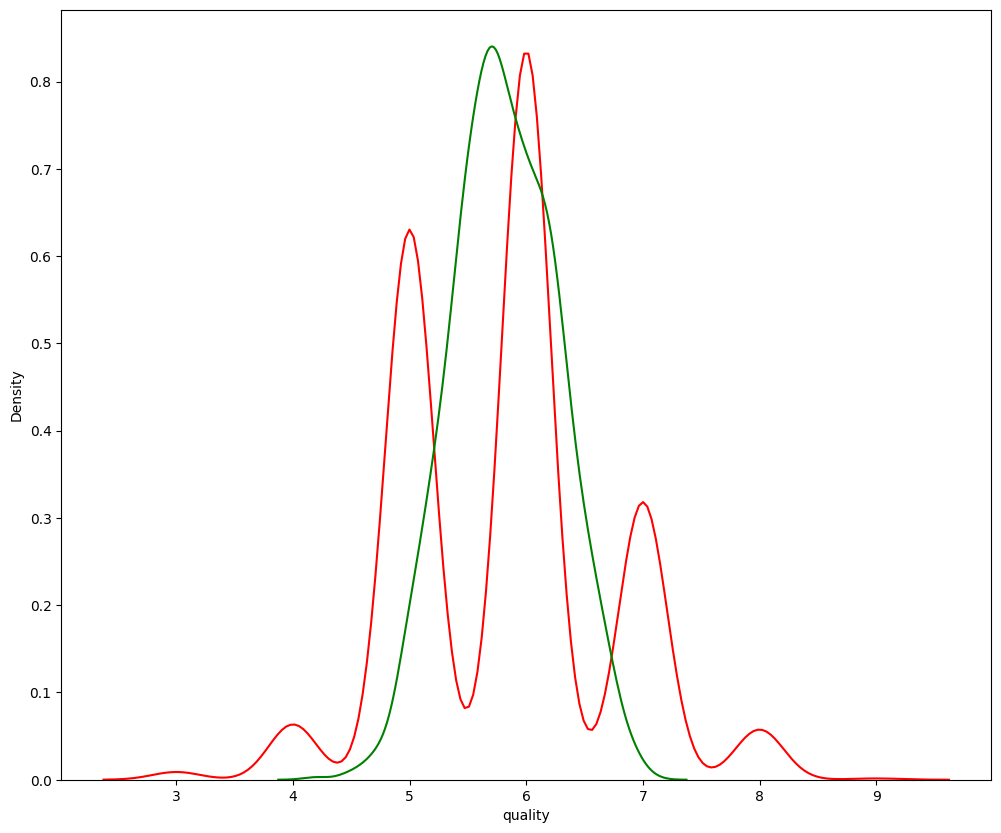

In [54]:
show_displacing(y_test, y_pred)

### Elastic Net

In [55]:
parameters_elnet = {'alpha':[0.01,1,10,100],'l1_ratio':[0.01,0.75,0.99,1]}
elnet_optimal = GridSearchCV(ElasticNet(max_iter=100000), parameters_elnet, scoring = 'neg_mean_squared_error').fit(X_train_slr, y_train)
alpha = elnet_optimal.best_params_['alpha']
l1_ratio = elnet_optimal.best_params_['l1_ratio']
elnet_optimal.best_params_

{'alpha': 0.01, 'l1_ratio': 0.01}

In [56]:
elnet_mlr = ElasticNet(alpha=alpha, l1_ratio=l1_ratio).fit(X_train, y_train)
y_pred = elnet_mlr.predict(X_test)

In [57]:
mlr_elastic = show_errors(y_test, y_pred)
print(mlr_elastic)
print(show_my_errors(y_test.values, y_pred))

{'MAE': 0.5801488873355348, 'MSE': 0.5577059231185064, 'RMSE': 0.7467971097416664, 'MAPE': 0.10360959037846722, 'R2': 0.26951773066185436}
{'myMAE': 0.5801488873355348, 'myMSE': 0.5577059231185064, 'myRMSE': 0.7467971097416664, 'myMAPE': 0.10360959037846722, 'myR2': 0.26951773066185436}


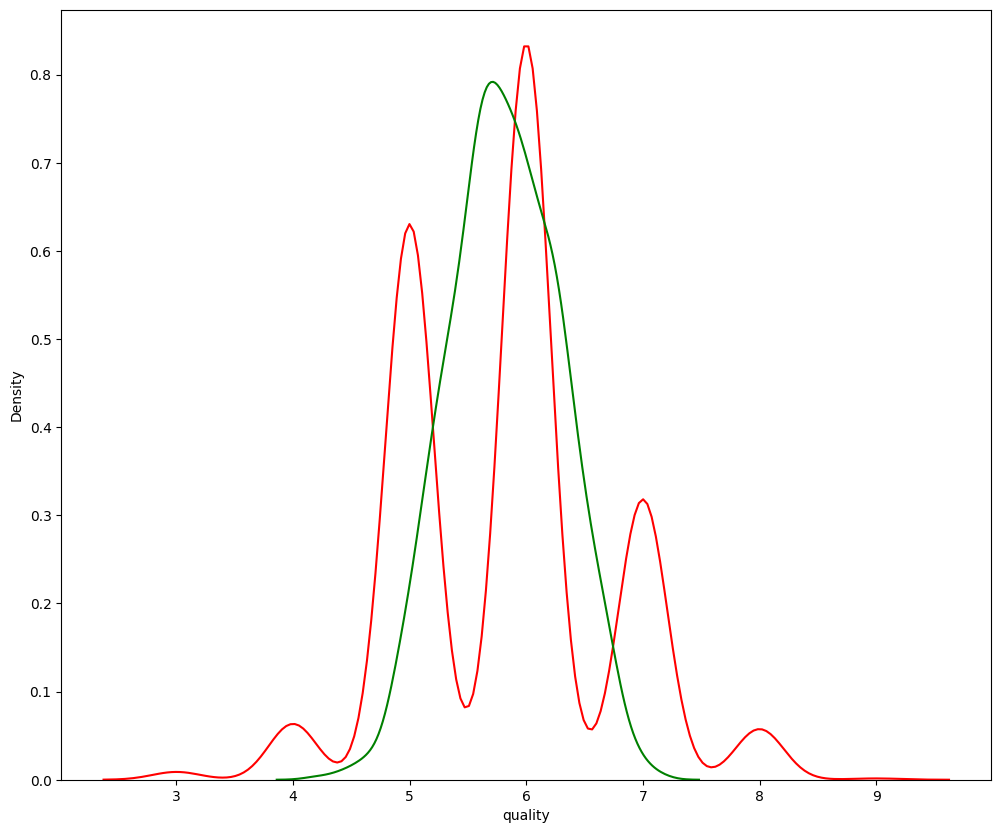

In [58]:
show_displacing(y_test, y_pred)

In [59]:
import pickle
with open('../data/mlr_elastic.pickle', 'wb') as f:
    pickle.dump(elnet_mlr, f)

In [60]:
print(elnet_mlr.predict(X_test))

[5.41541686 5.34303117 6.18451029 ... 6.06434453 5.97470334 5.41998754]


### Отбор наилучшей модели 

In [ ]:
mlr = [mlr_def, mlr_ridge, mlr_lasso, mlr_elastic]

In [58]:
for i in mlr:
    print(i)

{'MAE': 0.5743944323527203, 'MSE': 0.5492294241744615, 'RMSE': 0.741100144497666, 'MAPE': 0.10247041369927537, 'R2': 0.2806202345586484}
{'MAE': 0.5743932335817921, 'MSE': 0.5492255291332994, 'RMSE': 0.7410975166152558, 'MAPE': 0.10247030481178979, 'R2': 0.2806253362769363}
{'MAE': 0.5771701682328125, 'MSE': 0.5516655500719968, 'RMSE': 0.7427419135015856, 'MAPE': 0.10295061328596503, 'R2': 0.27742940100236413}
{'MAE': 0.5744218695622719, 'MSE': 0.5491515386696328, 'RMSE': 0.7410475954145137, 'MAPE': 0.10248080954801655, 'R2': 0.2807222488603751}


**Наилучшей** моделью оказалась **Elastic Net**

In [59]:
print(mlr[3])

{'MAE': 0.5744218695622719, 'MSE': 0.5491515386696328, 'RMSE': 0.7410475954145137, 'MAPE': 0.10248080954801655, 'R2': 0.2807222488603751}


## Полиномиальная регрессия

Определим набор входных данных для **пайплайна**: StandardScaler() для масштабирования, PolynomialFeatures для создания полинома и модель линейной регрессии

In [60]:
Input = [('polynomial', PolynomialFeatures(degree=2, include_bias=False)), ('model', LinearRegression())] 

Инициализируем пайплайн

In [61]:
pipe = Pipeline(Input)
pipe

Pipeline(steps=[('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

Теперь обучим модель линейной регрессии при помощи пайплайна

In [62]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

Далее обратимся к модели и вычислим предикты

In [63]:
y_pred = pipe.predict(X_test)

Рассмотрим метрики ошибок

In [64]:
ppl_def = show_errors(y_test, y_pred)
print(ppl_def)
print(show_my_errors(y_test.values, y_pred))

{'MAE': 0.5606787343408992, 'MSE': 0.5613108019395951, 'RMSE': 0.7492067818296863, 'MAPE': 0.10059063579018869, 'R2': 0.2647960665145681}
{'myMAE': 0.5606787343408992, 'myMSE': 0.5613108019395951, 'myRMSE': 0.7492067818296863, 'myMAPE': 0.10059063579018869, 'myR2': 0.2647960665145681}


Отсюда видно, что средний процент ошибки мало отличается от той же характеристики модели множественной регрессии, ровно как и остальные метрики. Рассмотрим реальное и предсказанное распределение данных

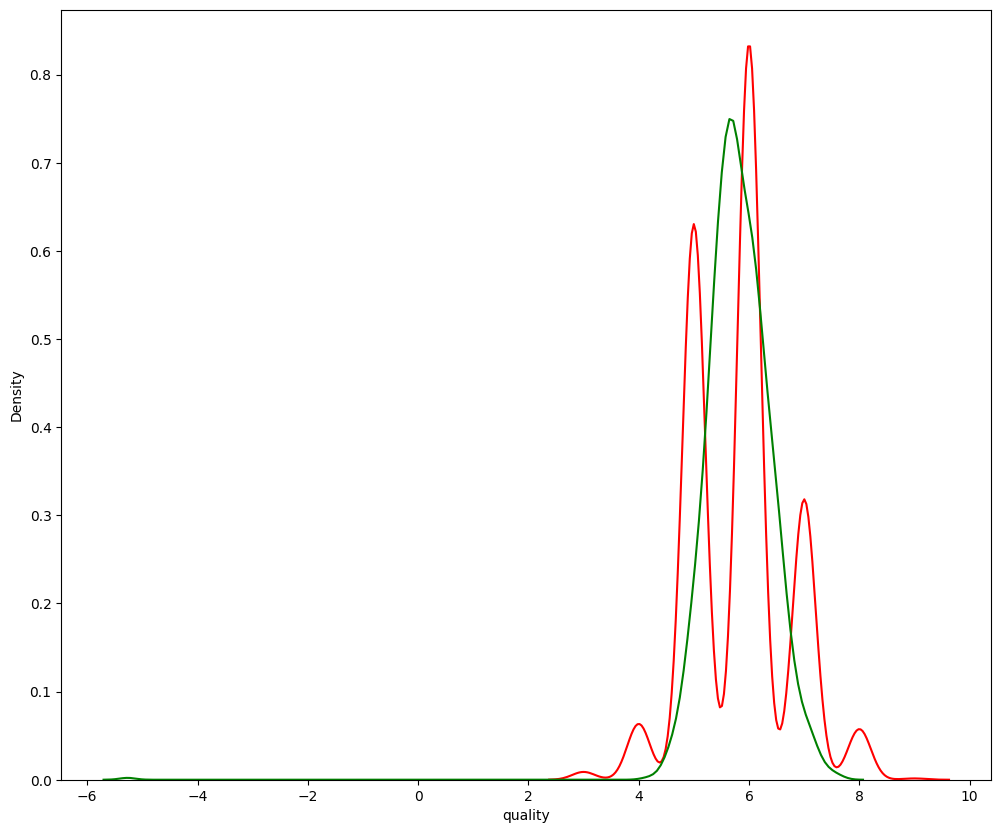

In [65]:
show_displacing(y_test, y_pred)

Видно, что модель относительно правдоподобно предсказывает реальные значения. Попробуем повысить степень до 3 и посмотреть, как изменятся метрики и визуальное представление распределения данных

In [66]:
Input1 = [('polynomial', PolynomialFeatures(degree=3, include_bias=False)), ('model', LinearRegression())]
pipe1 = Pipeline(Input1)
pipe1.fit(X_train, y_train)
y_pred1 = pipe1.predict(X_test)

print(show_errors(y_test, y_pred1))
print(show_my_errors(y_test.values, y_pred1))

{'MAE': 0.5669388967319748, 'MSE': 0.7680466064257544, 'RMSE': 0.8763826826368458, 'MAPE': 0.10237212728081405, 'R2': -0.00598613850498908}
{'myMAE': 0.5669388967319748, 'myMSE': 0.7680466064257544, 'myRMSE': 0.8763826826368458, 'myMAPE': 0.10237212728081405, 'myR2': -0.00598613850498908}


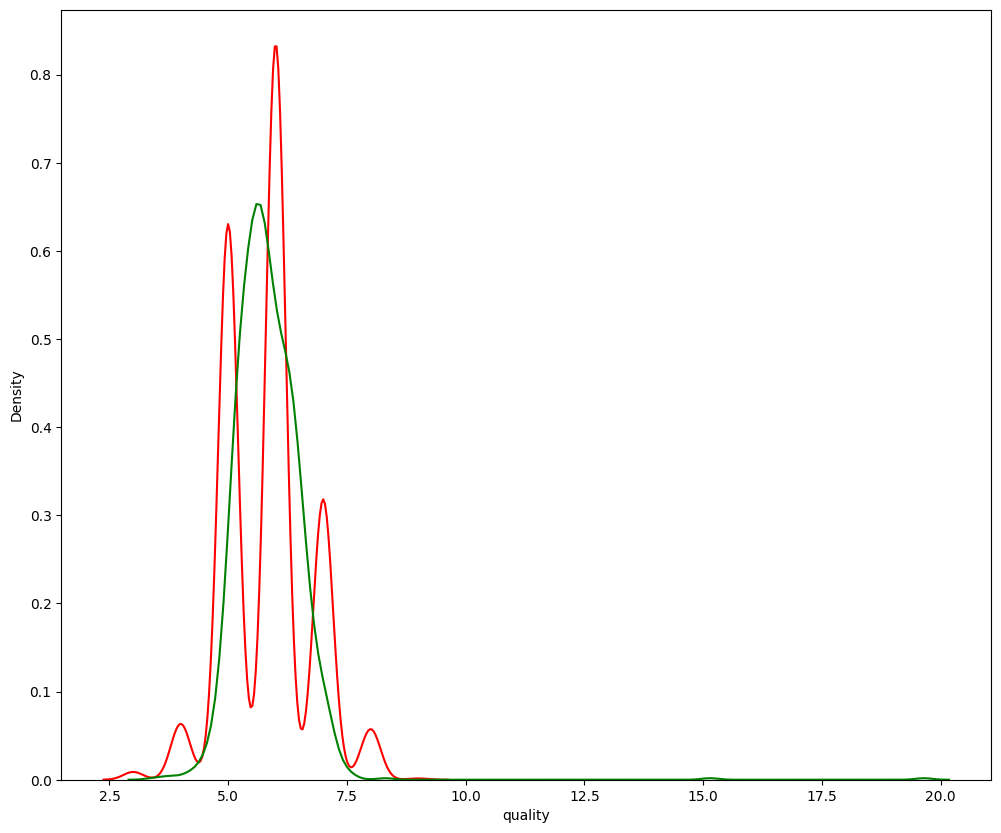

In [67]:
show_displacing(y_test, y_pred1)

От повышения степени показатели лишь ухудшились, поэтому перейдем к регуляризациям

### Ridge регуляризация

Создадим новый набор входных данных для пайплайна, включающий в себя Ridge. Подберем оптимальные **гиперпараметр альфа и степень полинома**

In [68]:
Input = [('polynomial', PolynomialFeatures(include_bias=False)), ('model', Ridge())]
pipe_r = Pipeline(Input)

parameters_r = {'model__alpha': np.arange(0, 1, 0.1), 'polynomial__degree': np.arange(2, 5, 1)}

ridge_optimal = GridSearchCV(pipe_r, parameters_r).fit(X_train, y_train)
ridge_optimal.best_params_

alpha = ridge_optimal.best_params_['model__alpha']
degree = ridge_optimal.best_params_['polynomial__degree']

In [69]:
Input = [('polynomial', PolynomialFeatures(degree=degree, include_bias=False)), ('model', Ridge(alpha = alpha))]
pipe_r = Pipeline(Input)

pipe_r.fit(X_train, y_train)
y_pred = pipe_r.predict(X_test)

ppl_ridge = show_errors(y_test, y_pred)
print(ppl_ridge)
print(show_my_errors(y_test.values, y_pred))

{'MAE': 0.5606787343409044, 'MSE': 0.5613108019396018, 'RMSE': 0.7492067818296907, 'MAPE': 0.10059063579018952, 'R2': 0.2647960665145592}
{'myMAE': 0.5606787343409044, 'myMSE': 0.5613108019396018, 'myRMSE': 0.7492067818296907, 'myMAPE': 0.10059063579018952, 'myR2': 0.26479606651455934}


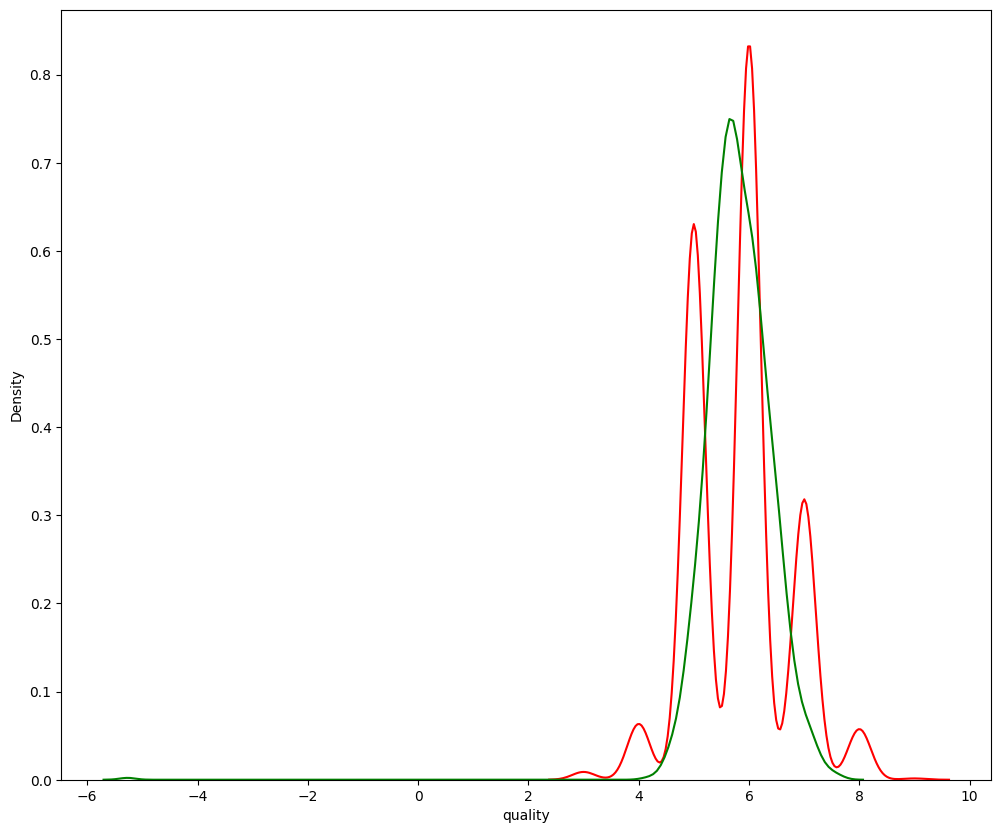

In [70]:
show_displacing(y_test, y_pred)

Из данных выше видно, что метрики модели **практически не изменились** по итогам регуляризации

### Lasso регуляризация

In [71]:
Input = [('polynomial', PolynomialFeatures(include_bias=False)), ('model', Lasso())]
pipe_l = Pipeline(Input)

parameters_l = {'model__alpha': np.arange(0.01, 1, 0.1), 'polynomial__degree': np.arange(2, 5, 1)}

lasso_optimal = GridSearchCV(pipe_l, parameters_l).fit(X_train, y_train)
lasso_optimal.best_params_

alpha = lasso_optimal.best_params_['model__alpha']
degree = lasso_optimal.best_params_['polynomial__degree']

In [72]:
Input = [('polynomial', PolynomialFeatures(degree=degree, include_bias=False)), ('model', Lasso(alpha=alpha))]
pipe_l = Pipeline(Input)
pipe_l.fit(X_train, y_train)
y_pred = pipe_l.predict(X_test)

ppl_lasso = show_errors(y_test, y_pred)
print(ppl_lasso)
print(show_my_errors(y_test.values, y_pred))

{'MAE': 0.5653249469262945, 'MSE': 0.5601425326848589, 'RMSE': 0.7484267049516999, 'MAPE': 0.10130882522350045, 'R2': 0.2663262635969763}
{'myMAE': 0.5653249469262945, 'myMSE': 0.5601425326848589, 'myRMSE': 0.7484267049516999, 'myMAPE': 0.10130882522350045, 'myR2': 0.2663262635969763}


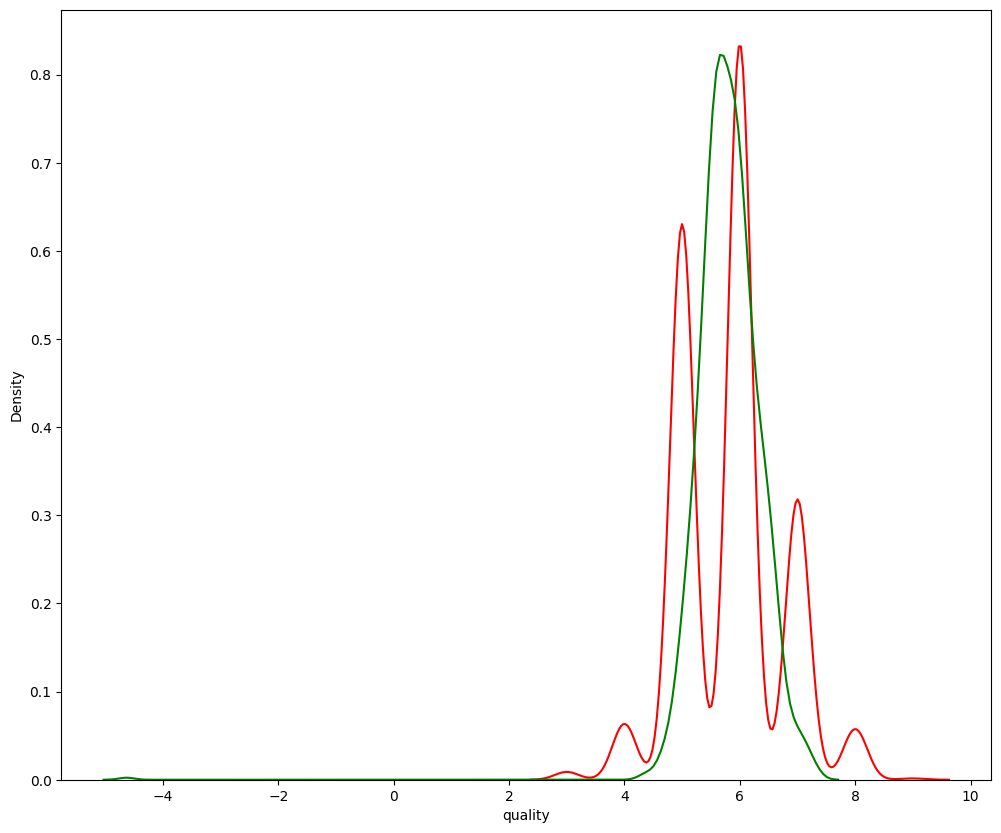

In [73]:
show_displacing(y_test, y_pred)

### Elactic Net

In [74]:
Input = [('polynomial', PolynomialFeatures(include_bias=False)), ('model', ElasticNet())]
pipe_elnet = Pipeline(Input)

parameters_elnet = {'model__alpha':[0.01,0.1,0.5,1,5,10,50,100],'model__l1_ratio':np.arange(0.01, 1, 0.1), 'polynomial__degree': np.arange(2, 5, 1)}
elnet_optimal = GridSearchCV(pipe_elnet, parameters_elnet, scoring = 'neg_mean_squared_error').fit(X_train_slr, y_train)

elnet_optimal.best_params_

alpha = elnet_optimal.best_params_['model__alpha']
l1_ratio = elnet_optimal.best_params_['model__l1_ratio']
degree = elnet_optimal.best_params_['polynomial__degree']

In [75]:
Input = [('polynomial', PolynomialFeatures(degree=degree, include_bias=False)), ('model', ElasticNet(alpha=alpha, l1_ratio=l1_ratio))]
pipe_elnet = Pipeline(Input)
pipe_elnet.fit(X_train, y_train)
y_pred = pipe_elnet.predict(X_test)

ppl_elnet = show_errors(y_test, y_pred)
print(ppl_elnet)
print(show_my_errors(y_test.values, y_pred))

{'MAE': 0.5862873311765858, 'MSE': 0.5556197478848361, 'RMSE': 0.7453990527796747, 'MAPE': 0.10458170735185254, 'R2': 0.27225019943394}
{'myMAE': 0.5862873311765858, 'myMSE': 0.5556197478848361, 'myRMSE': 0.7453990527796747, 'myMAPE': 0.10458170735185254, 'myR2': 0.27225019943394}


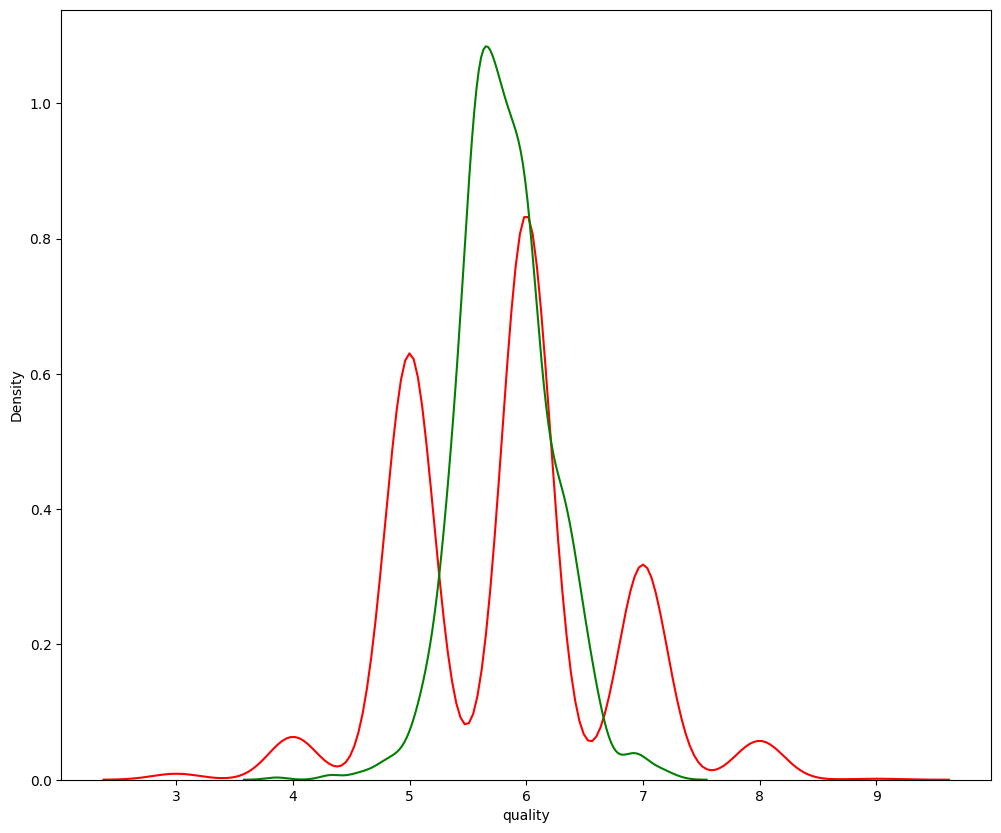

In [76]:
show_displacing(y_test, y_pred)

### Отбор наилучшей модели 

In [77]:
ppl = [ppl_def, ppl_ridge, ppl_lasso, ppl_elnet]

In [78]:
for i in ppl:
    print(i)

{'MAE': 0.5606787343408992, 'MSE': 0.5613108019395951, 'RMSE': 0.7492067818296863, 'MAPE': 0.10059063579018869, 'R2': 0.2647960665145681}
{'MAE': 0.5606787343409044, 'MSE': 0.5613108019396018, 'RMSE': 0.7492067818296907, 'MAPE': 0.10059063579018952, 'R2': 0.2647960665145592}
{'MAE': 0.5653249469262945, 'MSE': 0.5601425326848589, 'RMSE': 0.7484267049516999, 'MAPE': 0.10130882522350045, 'R2': 0.2663262635969763}
{'MAE': 0.5862873311765858, 'MSE': 0.5556197478848361, 'RMSE': 0.7453990527796747, 'MAPE': 0.10458170735185254, 'R2': 0.27225019943394}


Наилучшей моделью оказалась **Elnet**

In [81]:
print(ppl[3])

{'MAE': 0.5862873311765858, 'MSE': 0.5556197478848361, 'RMSE': 0.7453990527796747, 'MAPE': 0.10458170735185254, 'R2': 0.27225019943394}


# Выбор лучшей модели

In [82]:
print('Lasso SLR ', slr[2])
print('ElNet MLR ', mlr[3])
print('Elnet PLR ', ppl[3])

Lasso SLR  {'MAE': 0.6242901179648451, 'MSE': 0.6190776321556557, 'RMSE': 0.7868148652355621, 'MAPE': 0.11179900059917212, 'R2': 0.18913317056979484}
ElNet MLR  {'MAE': 0.5744218695622719, 'MSE': 0.5491515386696328, 'RMSE': 0.7410475954145137, 'MAPE': 0.10248080954801655, 'R2': 0.2807222488603751}
Lasso PLR  {'MAE': 0.5862873311765858, 'MSE': 0.5556197478848361, 'RMSE': 0.7453990527796747, 'MAPE': 0.10458170735185254, 'R2': 0.27225019943394}


С учетом отрыва по метрике R2 **наилучшей моделью** можно считать **множественную линейную регрессию с Elnet регуляризацией**.

# Реализация линейной регрессии

In [ ]:
mymlr = MyLinearRegression(100, 0.05)
mymlr.fit(X_train, y_train)
mymlr.p